---

## Notebook: Análise Exploratória de Dados (EDA) em Transações Financeiras

Integrantes: - Davi Rodrigues de Oliveira (10403139 - 10403139@mackenzista.com.br)  
 - Heitor Maciel de Vasconcellos Leite (10402559 - 10402559@mackenzista.com.br)  
 - Matheus Gonçalves Mendes (10402963 - 10402963@mackenzista.com.br)  
 - Roberto Rinco Silveira (10403243 - 10403243@mackenzista.com.br)

Descrição:

Este notebook realiza a análise exploratória (EDA) de três datasets de
transações financeiras usados para detecção de fraudes:  
 1. Credit Card Fraud Detection Dataset 2023  
 2. Credit Card Fraud Detection (ULB)  
 3. PaySim (Synthetic Financial Dataset)

O objetivo é investigar características estatísticas, distribuição das
variáveis, presença de outliers, possíveis correlações e balanceamento de
classes, preparando terreno para etapas futuras de modelagem, como detecção
de anomalias e previsão de valores.

---


In [4]:
# ==============================
# 1) Importação de Bibliotecas
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para exibir plots diretamente no notebook
%matplotlib inline

In [ ]:
# ==============================
# 2) Leitura dos Datasets
# ==============================
# Ajuste os caminhos dos arquivos .csv conforme sua organização local
# Exemplo:
#   credit_card_2023.csv  -> Credit Card Fraud Detection Dataset 2023
#   creditcard.csv        -> Credit Card Fraud Detection (ULB)
#   paysim.csv            -> PaySim (Synthetic Financial Dataset)

try:
    df1 = pd.read_csv("credit_card_2023.csv")  # Dataset 1
    df2 = pd.read_csv("creditcard.csv")  # Dataset 2 (ULB)
    df3 = pd.read_csv("paysim.csv")  # Dataset 3 (PaySim)
except FileNotFoundError:
    print(
        "Verifique se os arquivos CSV estão no caminho correto ou se os nomes estão corretos."
    )
    df1, df2, df3 = None, None, None

# Caso queira analisar apenas um ou dois datasets, basta comentar ou remover a leitura
# de quem não for usar.

In [6]:
# ==============================
# 3) Funções Auxiliares
# ==============================


def info_geral(df, nome_dataset):
    """
    Função para exibir informações gerais do dataframe:
        - Nome do dataset
        - Dimensões (linhas, colunas)
        - Amostra das primeiras linhas
        - Informações de tipos de dados
        - Verificação de valores nulos
    """
    print(f"\n=== Informações do {nome_dataset} ===")
    print(f"Dimensões: {df.shape[0]} linhas, {df.shape[1]} colunas\n")
    print("Primeiras 5 linhas:")
    display(df.head())
    print("\nTipos de dados e contagem de valores nulos:")
    display(df.info())
    print(df.isnull().sum())


def plot_distribuicao_classe(df, classe="Class", nome_dataset=""):
    """
    Plot da distribuição das classes (legítima x fraude).
    - classe: nome da coluna no DF que indica se a transação é fraude ou não.
    """
    if classe not in df.columns:
        print(
            f"{nome_dataset}: Coluna '{classe}' não encontrada para distribuição de classes."
        )
        return

    # Contagem de valores
    counts = df[classe].value_counts()

    plt.figure(figsize=(5, 4))
    sns.barplot(x=counts.index, y=counts.values, palette="viridis")
    plt.title(f"Distribuição da coluna '{classe}' - {nome_dataset}")
    plt.xlabel("Classe")
    plt.ylabel("Frequência")
    plt.show()

    print(f"\n{nome_dataset} - Distribuição de Classe:\n{counts}\n")


def plot_correlacao(df, nome_dataset=""):
    """
    Plot da matriz de correlação.
    """
    plt.figure(figsize=(10, 8))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, cmap="coolwarm", annot=False)
    plt.title(f"Matriz de Correlação - {nome_dataset}")
    plt.show()


=== Informações do Dataset 1: Credit Card Fraud Detection 2023 ===
Dimensões: 568630 linhas, 31 colunas

Primeiras 5 linhas:


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0



Tipos de dados e contagem de valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20

None

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


C:\Users\heito\AppData\Local\Temp\ipykernel_26996\1286796703.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


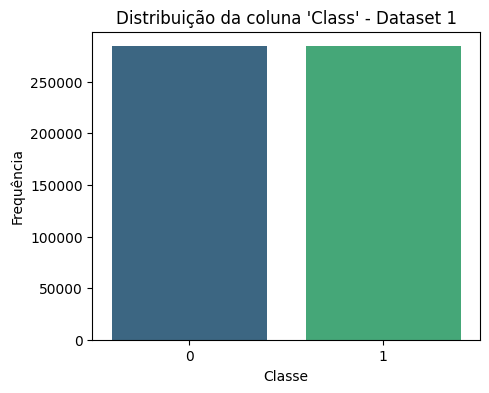


Dataset 1 - Distribuição de Classe:
Class
0    284315
1    284315
Name: count, dtype: int64



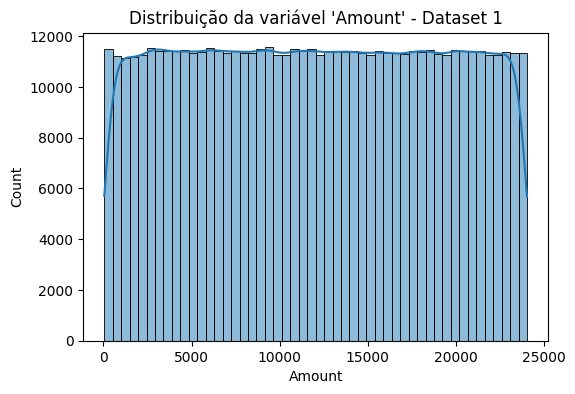

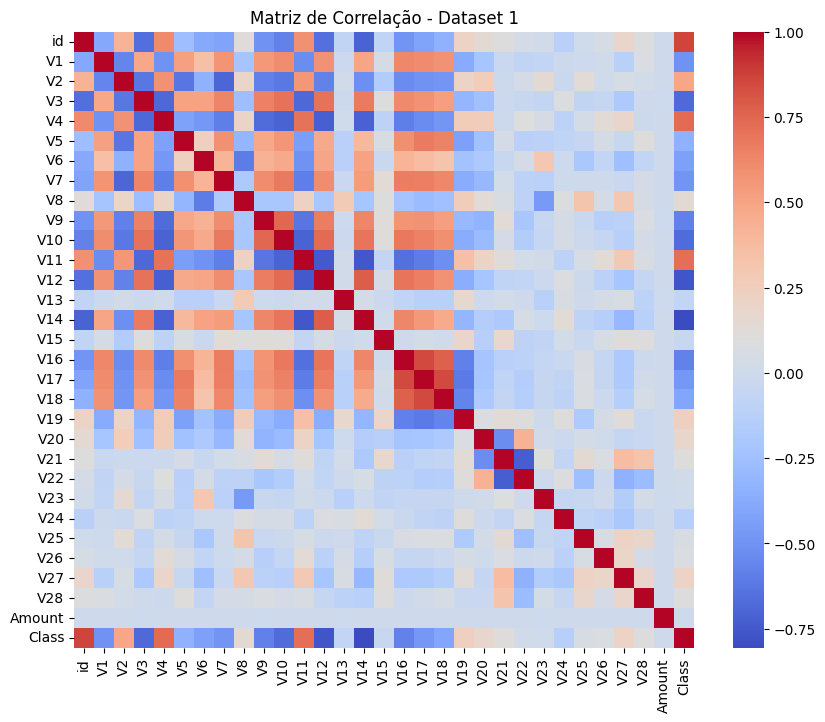

In [7]:
# ==============================
# 4) Análise Exploratória - Dataset 1 (Credit Card Fraud Detection 2023)
# ==============================
if df1 is not None:
    info_geral(df1, "Dataset 1: Credit Card Fraud Detection 2023")

    # Exemplo: se houver uma coluna "Class" que indica fraude (1) ou não (0)
    if "Class" in df1.columns:
        plot_distribuicao_classe(df1, classe="Class", nome_dataset="Dataset 1")

    # Exemplo de distribuição de valores numéricos relevantes,
    # como "Amount" se existir no dataset
    if "Amount" in df1.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df1["Amount"], bins=50, kde=True)
        plt.title("Distribuição da variável 'Amount' - Dataset 1")
        plt.show()

    # Matriz de correlação
    plot_correlacao(df1, "Dataset 1")


=== Informações do Dataset 2: Credit Card Fraud Detection (ULB) ===
Dimensões: 284807 linhas, 31 colunas

Primeiras 5 linhas:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Tipos de dados e contagem de valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20

None

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


C:\Users\heito\AppData\Local\Temp\ipykernel_26996\1286796703.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


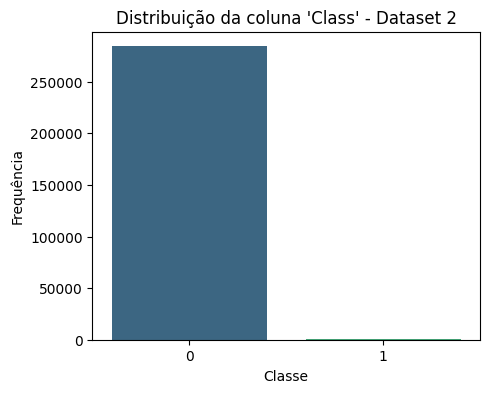


Dataset 2 - Distribuição de Classe:
Class
0    284315
1       492
Name: count, dtype: int64



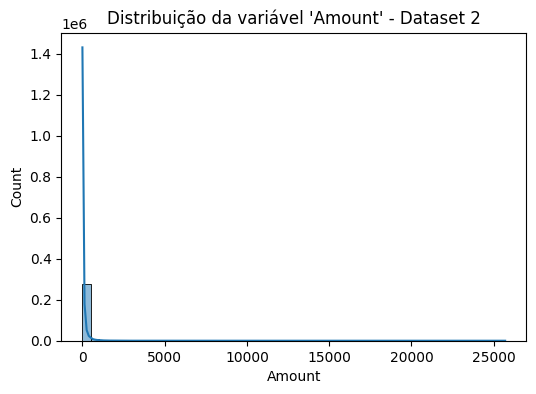

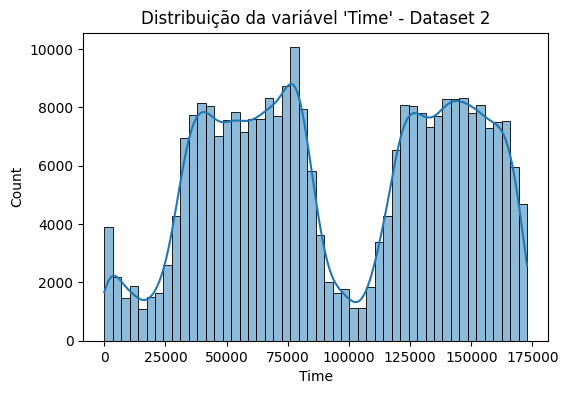

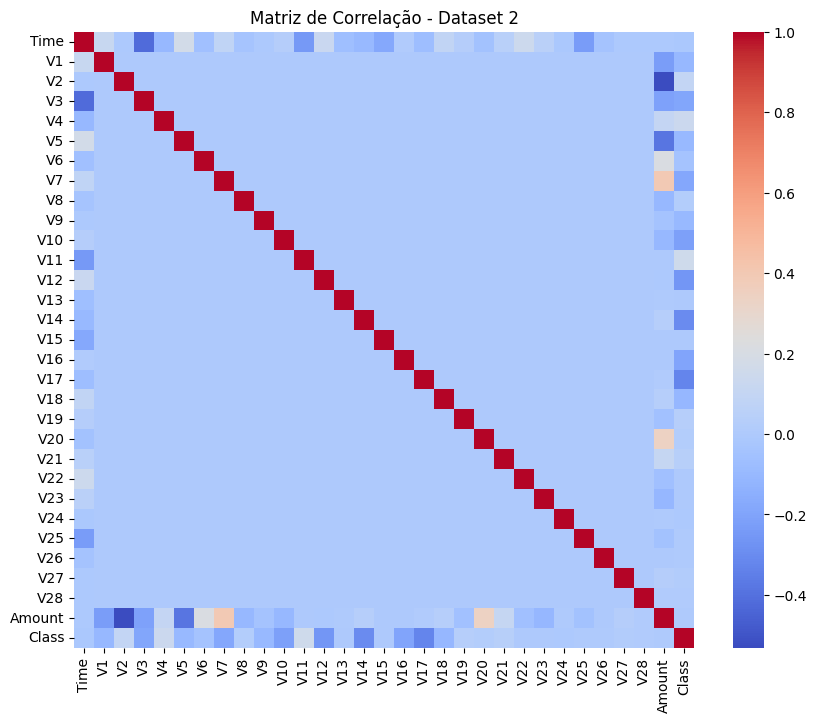

In [8]:
# ==============================
# 5) Análise Exploratória - Dataset 2 (Credit Card Fraud Detection ULB)
# ==============================
if df2 is not None:
    info_geral(df2, "Dataset 2: Credit Card Fraud Detection (ULB)")

    # Exemplo: se houver uma coluna "Class" que indica fraude (1) ou não (0)
    if "Class" in df2.columns:
        plot_distribuicao_classe(df2, classe="Class", nome_dataset="Dataset 2")

    # Exemplo de distribuição de valores numéricos relevantes,
    # como "Amount" se existir no dataset
    if "Amount" in df2.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df2["Amount"], bins=50, kde=True)
        plt.title("Distribuição da variável 'Amount' - Dataset 2")
        plt.show()

    # Se o dataset tiver a coluna "Time", muitas vezes esse dataset (ULB) tem
    # "Time" em segundos contados a partir de uma referência.
    if "Time" in df2.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df2["Time"], bins=50, kde=True)
        plt.title("Distribuição da variável 'Time' - Dataset 2")
        plt.show()

    # Matriz de correlação
    plot_correlacao(df2, "Dataset 2")


=== Informações do Dataset 3: PaySim - Synthetic Financial Dataset ===
Dimensões: 6362620 linhas, 11 colunas

Primeiras 5 linhas:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



Tipos de dados e contagem de valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


None

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


C:\Users\heito\AppData\Local\Temp\ipykernel_26996\1286796703.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


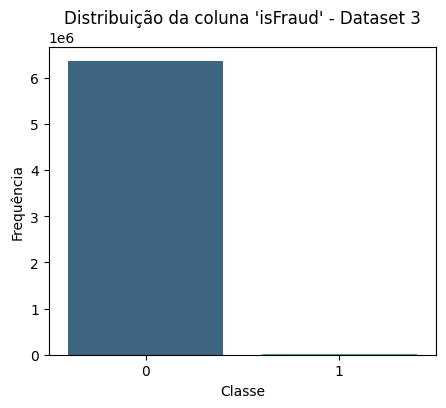


Dataset 3 - Distribuição de Classe:
isFraud
0    6354407
1       8213
Name: count, dtype: int64



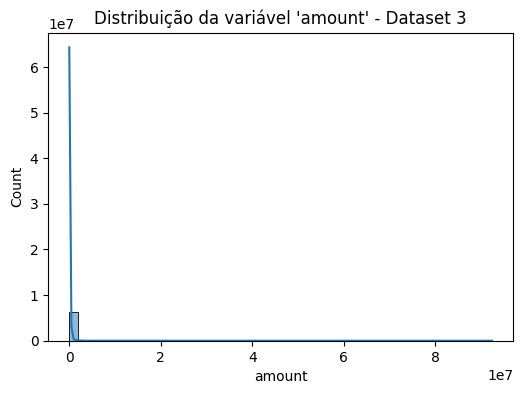

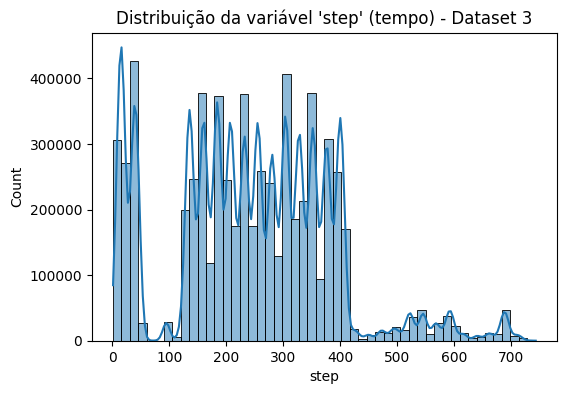

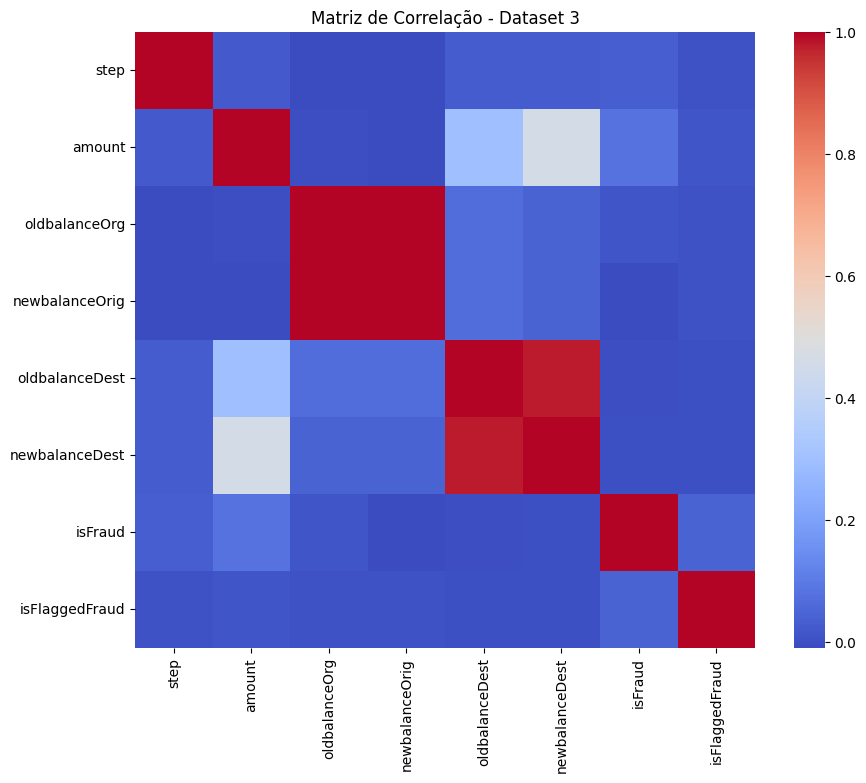

In [9]:
# ==============================
# 6) Análise Exploratória - Dataset 3 (PaySim - Synthetic Financial Dataset)
# ==============================
if df3 is not None:
    info_geral(df3, "Dataset 3: PaySim - Synthetic Financial Dataset")

    # No PaySim, muitas vezes a coluna de fraude chama-se "isFraud" ou similar
    # Ajuste conforme a nomenclatura do arquivo.
    if "isFraud" in df3.columns:
        plot_distribuicao_classe(df3, classe="isFraud", nome_dataset="Dataset 3")

    # Exemplo de distribuição da variável "amount" caso exista
    if "amount" in df3.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df3["amount"], bins=50, kde=True)
        plt.title("Distribuição da variável 'amount' - Dataset 3")
        plt.show()

    # Se houver uma coluna "step" ou similar que indica tempo (ex: step de 1 hora)
    if "step" in df3.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df3["step"], bins=50, kde=True)
        plt.title("Distribuição da variável 'step' (tempo) - Dataset 3")
        plt.show()

    # Para ver correlação apenas de colunas numéricas
    plot_correlacao(df3, "Dataset 3")